# Exercises 5 - Marja Satukangas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

## Exercise 5a: Fashion MNIST (5p)

Create a deep convolutional network model for classifying Fashion MNIST data (https://keras.io/api/datasets/fashion_mnist/). Take care to manage possible overfitting. Analyse classification performance by using confusion matrix. Compare the accuracy of your model with standard MNIST. Are there differences? Why?

In [8]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_val = x_val.reshape(-1,28,28,1).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

In [46]:
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras import regularizers 

model = keras.models.Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
          
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_14 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 64)        

In [47]:
hist = model.fit(x_train, y_train, epochs=9, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/9
469/469 [==============================] - 165s 353ms/step - loss: 0.5654 - acc: 0.7924 - val_loss: 0.3980 - val_acc: 0.8556
Epoch 2/9
469/469 [==============================] - 161s 344ms/step - loss: 0.3468 - acc: 0.8748 - val_loss: 0.3097 - val_acc: 0.8889
Epoch 3/9
469/469 [==============================] - 162s 345ms/step - loss: 0.2937 - acc: 0.8921 - val_loss: 0.2755 - val_acc: 0.9006
Epoch 4/9
469/469 [==============================] - 168s 358ms/step - loss: 0.2635 - acc: 0.9022 - val_loss: 0.2601 - val_acc: 0.9061
Epoch 5/9
469/469 [==============================] - 160s 340ms/step - loss: 0.2423 - acc: 0.9112 - val_loss: 0.2429 - val_acc: 0.9106
Epoch 6/9
469/469 [==============================] - 159s 339ms/step - loss: 0.2264 - acc: 0.9161 - val_loss: 0.2402 - val_acc: 0.9117
Epoch 7/9
469/469 [==============================] - 159s 339ms/step - loss: 0.2127 - acc: 0.9205 - val_loss: 0.2308 - val_acc: 0.9174
Epoch 8/9
469/469 [==============================] - 15

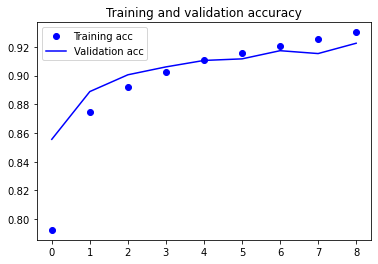

In [48]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(acc, 'bo', label='Training acc')
plt.plot(val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.show()

In [49]:
Y_pred = np.argmax(model.predict(x_val), axis=1)

In [50]:
y_val_cat=np.argmax((y_val), axis=1)

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val_cat, Y_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[861   0  26  14   2   1  89   0   7   0]
 [  3 979   1  10   2   0   2   0   3   0]
 [ 16   0 902   9  36   0  34   0   3   0]
 [ 11   3  12 923  25   0  24   0   2   0]
 [  0   0  32  19 892   0  57   0   0   0]
 [  0   0   0   0   0 984   0  11   0   5]
 [ 88   0  59  22  62   0 763   0   6   0]
 [  0   0   0   0   0  10   0 956   0  34]
 [  2   0   1   4   0   1   2   1 989   0]
 [  1   0   0   0   0   4   0  18   0 977]]


## Evaluation

Compared to standard mnist, this model got lower accuracy score. This is probably because this task is more complicated and there is more variance between samples of same category. Training the model was quite time consuming so it was not possible to experiment very many different models. 

Confusion matrix shows that model performs quite well and not many samples are pointed to a wrong category. Category 0 (t-shirt) and 6 (shirt) are mixed up quite often. From the confusion matrix we can also see that different kinds of shoes (sandal, sneaker, ankle boots) are more often mixed up together than that they are predicted to be some other category of fashion.